In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
import re

In [7]:
df_red = pd.read_csv('Red.csv', low_memory=False)
df_red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [18]:
df_red['Year'] = df_red['Year'].apply(pd.to_numeric, errors='coerce')
df_red.sort_values('Year', ascending = False)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
3586,Tempranillo 2019,Spain,La Mancha,Bodegas Artero,3.8,29,4.99,2019.0
986,The Guv’nor 2019,Spain,Valdepeñas,Félix Solís,4.0,1333,6.20,2019.0
5407,Nero d'Avola 2019,Italy,Terre Siciliane,Cusumano,3.4,44,8.69,2019.0
7553,Cabernet Sauvignon 2019,South Africa,Western Cape,Golden Kaan,3.3,74,5.79,2019.0
4287,Vineyards Malbec 2019,Argentina,Mendoza,Trapiche,3.5,3393,4.78,2019.0
...,...,...,...,...,...,...,...,...
2201,Cinquanta Collezione N.V.,Italy,Vino d'Italia,San Marzano,4.3,19454,16.38,NaN
2404,Limited Edition 10 Vendemmie N.V.,Italy,Montepulciano d'Abruzzo,Tenuta Ulisse,4.6,2080,30.90,NaN
4527,Lambrusco Reggiano Dolce N.V.,Italy,Reggiano,Riunite,3.7,359,5.89,NaN
4833,Little James' Basket Press Rouge N.V.,France,Vin de France,Château de Saint Cosme,3.6,3818,7.90,NaN


In [19]:
# First of all we'll isolate the red wines made in Greece

df_red_greek = df_red[(df_red['Country']  == 'Greece')]
df_red_greek

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
169,Halkidiki Limnio - Merlot 2013,Greece,Chalkidiki,Tsantali,3.2,105,12.49,2013.0
257,Driopi Classic Agiorgitiko Nemea 2017,Greece,Nemea,Κτημα Τσελεπου (Ktima Tselepos),3.7,107,11.50,2017.0
499,Γουμένισσα (Goumenissa) 2015,Greece,Goumenissa,Chatzivaritis Estate,3.7,115,20.00,2015.0
1034,Mavrotragano 2016,Greece,Santorini,Domaine Sigalas,4.2,136,36.95,2016.0
2465,Oenodea Red 2009,Greece,Drama,Costa Lazaridi,3.5,213,9.70,2009.0
4324,Cabernet Sauvignon 2013,Greece,Chalkidiki,Tsantali,3.7,34,17.79,2013.0
4847,Ghi kai Uranos Xinomavro 2017,Greece,Naoussa,Thymiopoulos,4.2,383,25.50,2017.0
5914,Ghi kai Uranos Xinomavro 2016,Greece,Naoussa,Thymiopoulos,4.1,492,21.90,2016.0
6294,Naoussa Alta 2016,Greece,Naoussa,Thymiopoulos,4.1,540,13.50,2016.0
7761,Rapsani Grande Reserve 2012,Greece,Rapsani,Tsantali,4.0,78,17.29,2012.0


In [20]:
top_greek = df_red_greek.sort_values('Rating', ascending = False)
top_greek.head(3)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
1034,Mavrotragano 2016,Greece,Santorini,Domaine Sigalas,4.2,136,36.95,2016.0
4847,Ghi kai Uranos Xinomavro 2017,Greece,Naoussa,Thymiopoulos,4.2,383,25.50,2017.0
5914,Ghi kai Uranos Xinomavro 2016,Greece,Naoussa,Thymiopoulos,4.1,492,21.90,2016.0


In [21]:
df_red.sort_values('Price', ascending = False)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
2344,Pomerol 2012,France,Pomerol,Pétrus,4.7,204,3410.79,2012.0
7466,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,France,Saint-Émilion Grand Cru,Château Ausone,4.5,72,1599.95,2010.0
5560,Pauillac (Premier Grand Cru Classé) 2010,France,Pauillac,Château Lafite Rothschild,4.4,457,1399.00,2010.0
4395,Pauillac (Premier Grand Cru Classé) 1992,France,Pauillac,Château Lafite Rothschild,4.5,346,1266.25,1992.0
4124,Pessac-Léognan (Premier Grand Cru Classé) 2010,France,Pessac-Léognan,Château Haut-Brion,4.6,327,1197.90,2010.0
...,...,...,...,...,...,...,...,...
7821,Tempranillo Cariñena 2018,Spain,Cariñena,Marques de Villanueva,3.7,79,3.99,2018.0
108,Cabernet - Shiraz 2016,Spain,La Mancha,Añoranza,3.4,103,3.95,2016.0
6408,Nero d'Avola 2018,Italy,Terre Siciliane,Monte Pietroso,3.8,56,3.79,2018.0
2938,Cal Y Canto Full Red 2018,Spain,La Mancha,Isidro Milagro,3.1,25,3.70,2018.0


In [22]:
df_red[(df_red['Price']  <= 400)].sort_values('Rating', ascending = False)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
3747,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,United States,St. Helena,Paul Hobbs,4.8,30,368.47,2015.0
8086,Veneto Alzero Cabernet 2009,Italy,Veneto,Quintarelli Giuseppe,4.8,85,324.95,2009.0
2381,Amarone della Valpolicella Classico 2011,Italy,Amarone della Valpolicella Classico,Quintarelli Giuseppe,4.7,207,272.25,2011.0
2924,Since 1974 Primitivo di Manduria Limited Plati...,Italy,Primitivo di Manduria,Emera,4.7,25,53.35,2016.0
6214,Sassicaia 2009,Italy,Bolgheri Sassicaia,Tenuta San Guido,4.7,5308,329.00,2009.0
...,...,...,...,...,...,...,...,...
3091,Syrah 2018,France,Vin de France,Maison les Alexandrins,2.8,26,9.95,2018.0
4542,Dolcetto d'Alba 2013,Italy,Dolcetto d'Alba,Piazzo,2.7,36,9.12,2013.0
4176,Marche Rosso 2015,Italy,Marche,Roberto Lucarelli,2.6,33,11.50,2015.0
4998,Cabernet Sauvignon 2016,France,Pays d'Oc,Fortant,2.5,40,8.29,2016.0


In [23]:
df_red[(df_red['Price']  <= 400)].mean()['NumberOfRatings']

C:\Users\Kostas\AppData\Local\Temp\ipykernel_20904\2814040583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_red[(df_red['Price']  <= 400)].mean()['NumberOfRatings']


414.6818287575617

In [61]:
df_red_inter = df_red[(df_red['Price']  <= 300) & (df_red['NumberOfRatings'] >=300)].sort_values('Rating', ascending = False)

C:\Users\Kostas\AppData\Local\Temp\ipykernel_20904\1755009279.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_red_inter_avg = df_red_inter.groupby('Country').mean()['Rating'].reset_index()


<Axes: xlabel='Country'>

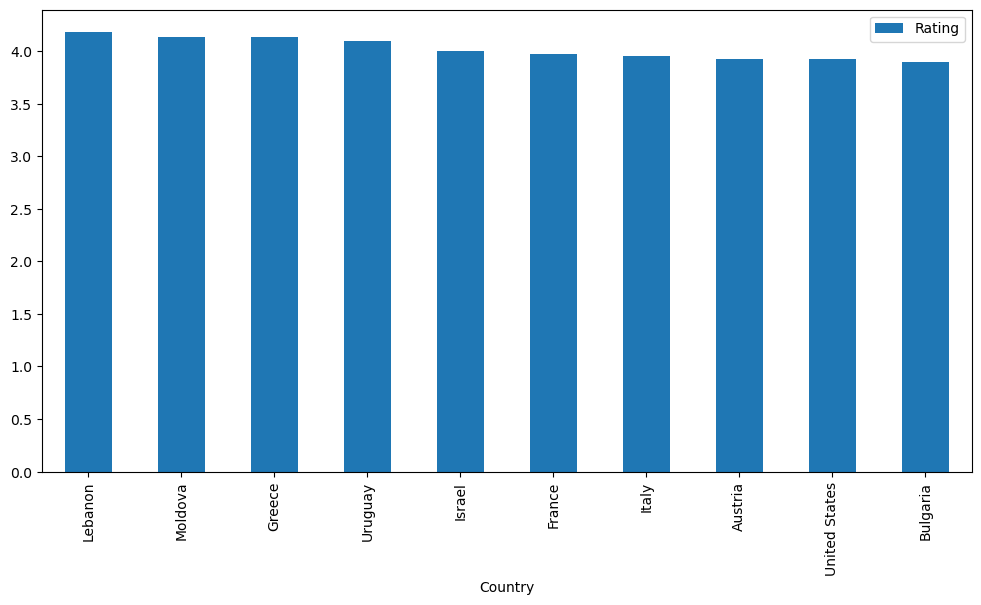

In [71]:
df_red_inter_avg = df_red_inter.groupby('Country').mean()['Rating'].reset_index()
df_red_inter_avg.sort_values('Rating', ascending = False).head(10).head(10).plot(x = 'Country', y = 'Rating', kind = 'bar', figsize=(12,6))

In [72]:
df_red_inter_cheap = df_red_inter[(df_red_inter['Price']  <= 50)].sort_values('Rating', ascending = False)
df_red_inter_cheap.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
2404,Limited Edition 10 Vendemmie N.V.,Italy,Montepulciano d'Abruzzo,Tenuta Ulisse,4.6,2080,30.90,NaN
7378,EPU 2016,Chile,Puente Alto,Almaviva,4.5,709,46.34,2016.0
1161,60 Sessantanni Old Vines Primitivo di Manduria...,Italy,Primitivo di Manduria,San Marzano,4.5,14148,30.95,2015.0
3976,5 Stelle Sfursat 2016,Italy,Valtellina,Nino Negri,4.5,315,38.89,2016.0
6162,Cosimo Varvaglione Collezione Privata Primitiv...,Italy,Primitivo di Manduria,Varvaglione,4.5,526,21.90,2015.0


In [73]:
df_red_inter_medium = df_red_inter[(df_red_inter['Price']  > 50) & (df_red_inter['Price']  <= 150)].sort_values('Rating', ascending = False)
df_red_inter_medium.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
3827,Ripe al Convento Brunello di Montalcino Riserv...,Italy,Brunello di Montalcino,Tenuta CastelGiocondo,4.6,302,117.42,2012.0
2234,Valbuena 5º 2014,Spain,Ribera del Duero,Vega Sicilia,4.6,1965,131.60,2014.0
945,Malbec Argentino 2017,Argentina,Mendoza,Catena Zapata,4.6,1314,77.01,2017.0
7180,Tignanello 2016,Italy,Toscana,Antinori,4.6,6711,109.00,2016.0
5185,Gran Enemigo Single Vineyard Gualtallary Caber...,Argentina,Gualtallary,El Enemigo,4.6,4180,82.86,2014.0


In [74]:
df_red_inter_exp = df_red_inter[(df_red_inter['Price']  > 150)].sort_values('Rating', ascending = False)
df_red_inter_exp.head(1)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
1582,Cos d'Estournel 2005,France,Saint-Estèphe,Cos d'Estournel,4.6,1608,248.95,2005.0
